In [1]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json'
url_vaccini = 'https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.json'

In [2]:
import urllib.request
import json 
import matplotlib.pyplot as plt
import numpy as np
import dateutil.parser

In [3]:
with urllib.request.urlopen(url) as response:
    html = response.read()

In [4]:
data = json.loads(html)

In [5]:
with urllib.request.urlopen(url_vaccini) as response:
    html = response.read()

In [6]:
data_vaccini = json.loads(html)

In [7]:
print(data[0])

{'data': '2020-02-24T18:00:00', 'stato': 'ITA', 'ricoverati_con_sintomi': 101, 'terapia_intensiva': 26, 'totale_ospedalizzati': 127, 'isolamento_domiciliare': 94, 'totale_positivi': 221, 'variazione_totale_positivi': 0, 'nuovi_positivi': 221, 'dimessi_guariti': 1, 'deceduti': 7, 'casi_da_sospetto_diagnostico': None, 'casi_da_screening': None, 'totale_casi': 229, 'tamponi': 4324, 'casi_testati': None, 'note': None, 'ingressi_terapia_intensiva': None, 'note_test': None, 'note_casi': None, 'totale_positivi_test_molecolare': None, 'totale_positivi_test_antigenico_rapido': None, 'tamponi_test_molecolare': None, 'tamponi_test_antigenico_rapido': None}


In [8]:
print(data_vaccini['data'][0])

{'index': 0, 'data_somministrazione': '2020-12-27T00:00:00.000Z', 'fornitore': 'Moderna', 'area': 'SIC', 'fascia_anagrafica': '90+', 'sesso_maschile': 0, 'sesso_femminile': 1, 'prima_dose': 1, 'seconda_dose': 0, 'pregressa_infezione': 0, 'dose_addizionale_booster': 0, 'codice_NUTS1': 'ITG', 'codice_NUTS2': 'ITG1', 'codice_regione_ISTAT': 19, 'nome_area': 'Sicilia'}


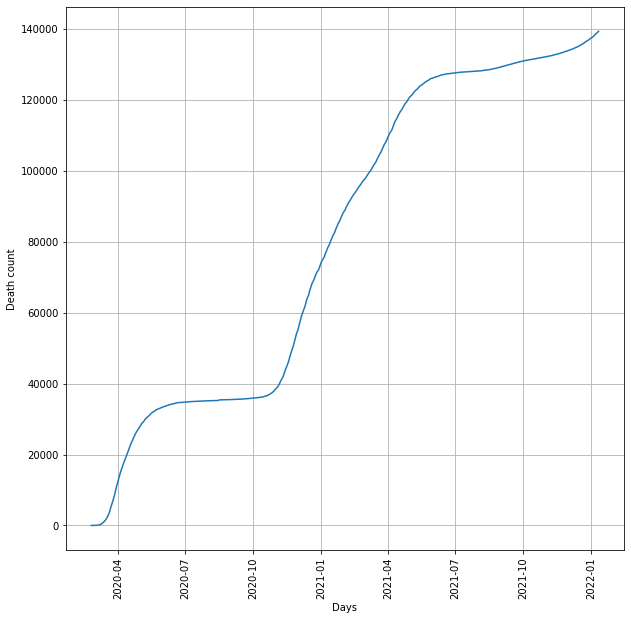

In [9]:
x = []
y = []

for row in data:
    y.append(row['deceduti'])
    x.append(dateutil.parser.isoparse(row['data']))

plt.rcParams["figure.figsize"] = (10,10)
plt.grid(True)    
plt.xticks(rotation=90)
plt.xlabel('Days')
plt.ylabel('Death count')
#plt.xticks(np.arange(min(x), max(x) + 1, 1.0))
plt.plot(x,y)
plt.show()

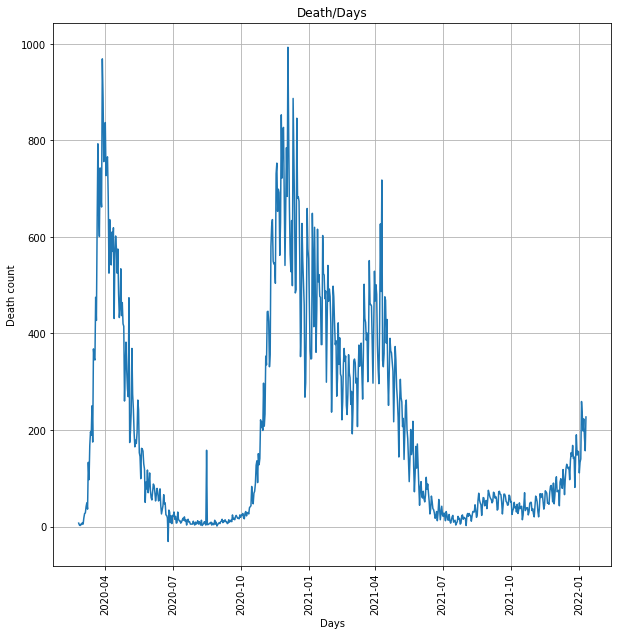

In [10]:
x = []
y = []
variazione_deceduti = [];
accumulatore_morti = 0;

for row in data:
    variazione_deceduti.append(row['deceduti'] - accumulatore_morti);
    accumulatore_morti = accumulatore_morti + variazione_deceduti[-1]

for i in range(len(data)):
    y.append(variazione_deceduti[i])
    x.append(dateutil.parser.isoparse(data[i]['data']))
    
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(True)    
plt.xticks(rotation=90)
plt.xlabel('Days')
plt.ylabel('Death count')
plt.title('Death/Days')
#plt.xticks(np.arange(min(x), max(x) + 1, 1.0))
plt.plot(x,y)
plt.show()